In [59]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [60]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [61]:
# to normalize the data - if number data we can scale and normalize the data 
# in our case it the images which we are going to normalize 
# so we the min and the max value 
# the min -> 0 and max -> 255

X = X/255.0 






In [ ]:
model = Sequential()

#layer 1
model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 2 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# model.add(layers.Dense(1,activation = 'sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [62]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
history = model.fit(X,y,batch_size=32,epochs=10,validation_split=0.25)
# model.fit(X,y,batch_size=40,validation_split=0.25)

Epoch 1/30
26/26 [==============================] - 4s 155ms/step - loss: 0.6406 - accuracy: 0.6686 - val_loss: 1.0490 - val_accuracy: 0.0000e+00
Epoch 2/30
26/26 [==============================] - 5s 184ms/step - loss: 0.5275 - accuracy: 0.7141 - val_loss: 0.7609 - val_accuracy: 0.5378
Epoch 3/30
26/26 [==============================] - 5s 187ms/step - loss: 0.3780 - accuracy: 0.8246 - val_loss: 0.4855 - val_accuracy: 0.7878
Epoch 4/30
26/26 [==============================] - 4s 170ms/step - loss: 0.2486 - accuracy: 0.9128 - val_loss: 0.4547 - val_accuracy: 0.7703
Epoch 5/30
26/26 [==============================] - 4s 167ms/step - loss: 0.1856 - accuracy: 0.9322 - val_loss: 0.5236 - val_accuracy: 0.7384
Epoch 6/30
26/26 [==============================] - 4s 163ms/step - loss: 0.1729 - accuracy: 0.9448 - val_loss: 0.1778 - val_accuracy: 0.9506
Epoch 7/30
26/26 [==============================] - 4s 159ms/step - loss: 0.1387 - accuracy: 0.9535 - val_loss: 0.3435 - val_accuracy: 0.8605
Ep

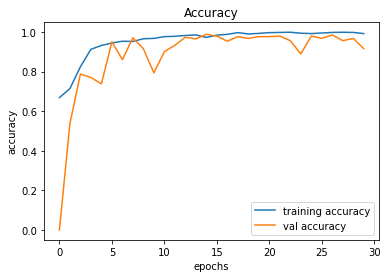

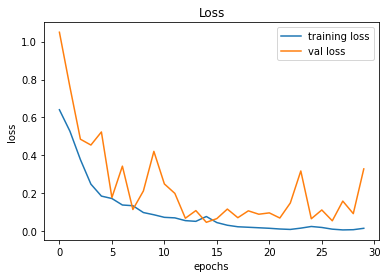

In [63]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()